# Constraint programming


We will use and import the `facile` library which gives access to a constraint programming API in Python.  

This notebook goes through basic notions of constraint programming, at a reasonable pace.  
The lecturer will explain more advanced concepts as the group moves forward and/or on demand.

- Solutions appear on demand as you uncomment the `%load` comments, but the point of the session is to **try first** without being stuck.

- You will find in the notebook blocks of different colors:

<div class="alert alert-warning">
**Questions** appear in yellow.
</div>

<div class="alert alert-danger">
You should **fully understand** what appears in red.
</div>

<div class="alert alert-info">
Blue blocks push *beyond the scope* of this course.
</div>

In [2]:
import facile
%matplotlib inline

<div class="alert alert-success">
<b>Example :</b><br />
We consider the problem of two variables taking their values on $a,b \in \{0,1\}$, and constrained by $a \neq b$.<br />

Find admissible values for $a$ and $b$.
</div>

The basic syntax of `facile` goes as follows:

In [3]:
# Variables
# a and b are both defined on [0, 1]
a = facile.variable([0, 1])
b = facile.variable([0, 1])

# Constraints
# Expressions and constraints can be built with usual operators: +, *, <=, etc.
facile.constraint(a != b)

# Resolution
# We want a solution for a and b and get their values with method .value()
sol = facile.solve([a, b])

assert sol, "No solution found"
print ("Solution found : a={}, b={}".format(a.value(), b.value()))

Solution found : a=0, b=1


## Basic problems

<div class="alert alert-warning">
<b>Problem #1: (super easy)</b><br />

Consider the following problem. Modify it so as it has a solution.
</div>

In [4]:
# Variables
a = facile.variable([0, 1])
b = facile.variable([0, 1])
c = facile.variable([0, 2])

# Constraints
facile.constraint(a != b)
facile.constraint(b != c)
facile.constraint(c != a)

# Resolution
if facile.solve([a, b, c]):
    print ("Solution found : a=%d, b=%d, c=%d" % (a.value(), b.value(), c.value()))
else:
    print ("No solution found")

Solution found : a=0, b=1, c=2


<div class="alert alert-warning">
<b>Problem #2: (easy)</b><br />

Find four integers so that their sum is 711 and their product is 711000000.
</div>

<div class="alert alert-info">
The original problem is stated as follows:
<blockquote>
A guy walks into a 7-11 store and selects four items to buy. The clerk at the counter informs the gentleman that the total cost of the four items is 7.11 dollars. He was completely surprised that the cost was the same as the name of the store. The clerk informed the man that he simply multiplied the cost of each item and arrived at the total. The customer calmly informed the clerk that the items should be added and not multiplied. The clerk then added the items together and informed the customer that the total was still exactly 7.11 dollars.
<br/><br/>
What are the exact costs of each item?
</blockquote>

We can find a beautiful [algebraic resolution](http://everydayexplanations.blogspot.fr/2011/08/711-problem.html) which may help to define the domains of each value.

</div>

In [17]:
# Variables
# There is a risk of integer overflow when computing a*b*c*d
# We need small domains...

a = facile.variable(range(0, 320))
b = facile.variable(range(0, 160))
c = facile.variable(range(0, 130))
d = facile.variable(range(0, 130))

# Constraints
facile.constraint(a+b+c+d==711)
facile.constraint(a*b*c*d==711000000)
# Resolution
sol = facile.solve([a, b, c, d], backtrack=True)
print("Solution found: a={}, b={}, c={}, d={}".format(*sol.solution))


Solution found: a=316, b=150, c=120, d=125


<div class="alert alert-info">
**Let's look further into this!** (out of scope)<br />

Let's check how many backtracks occur during the resolution process,  
and have a look at the constraint propagation effect on the domain of each variable.
</div>

In [7]:
# %load seven_eleven.py
# Variables
# There is a risk of integer overflow when computing a*b*c*d
# We need small domains...
import facile
a = facile.variable(range(0, 321))
b = facile.variable(range(0, 161))
c = facile.variable(range(0, 131))
d = facile.variable(range(0, 131))

# Constraints

# The problem
facile.constraint(a + b + c + d == 711)

print("Domains after posting the sum constraint")
for x in [a, b, c, d]:
    domain = x.domain()
    print("  {!r} (size {})".format(domain, len(domain)))

facile.constraint(a * b * c * d == 711000000)

print("\nDomains after posting the mul constraint")
for x in [a, b, c, d]:
    domain = x.domain()
    print("  {!r} (size {})".format(domain, len(domain)))

print()

# Resolution
sol = facile.solve([a, b, c, d], backtrack=True)

# wow ! Only two backtracks !!
print(sol)
print("Solution found: a={}, b={}, c={}, d={}".format(*sol.solution))


Domains after posting the sum constraint
  [291, 292, 293, 294, 295, 296, ..., 320] (size 30)
  [131, 132, 133, 134, 135, 136, ..., 160] (size 30)
  [101, 102, 103, 104, 105, 106, ..., 130] (size 30)
  [101, 102, 103, 104, 105, 106, ..., 130] (size 30)

Domains after posting the mul constraint
  [300, 301, 302, 303, 304, 305, ..., 320] (size 21)
  [132, 133, 134, 135, 136, 137, ..., 160] (size 29)
  [107, 108, 109, 110, 111, 112, ..., 130] (size 24)
  [107, 108, 109, 110, 111, 112, ..., 130] (size 24)

Backtracks                    : 2
Current solution              : [316, 150, 120, 125]
Resolution status             : True
Resolution time               : 0.00014s

Solution found: a=316, b=150, c=120, d=125


<div class="alert alert-warning">
<b>Problem #3: (easy)</b><br />
Solve SEND + MORE = MONEY (two methods). Pretty-print the result.
</div>

You may need to use the following constraint:
```python
c1 = facile.alldifferent([a, b, c, ...])
# to be posted to the solver
facile.constraint(c1)
```


In [26]:
[s, e, n, d, m, o, r, y] = [facile.variable(range(0,10)) for i in range(8)]

c1 = facile.alldifferent([s, e, n, d, m, o, r, y])
facile.constraint(s>0)
facile.constraint(m>0)
facile.constraint(c1)
facile.constraint(s*1000 + e*100 + n*10 + d + m*1000 + o*100 + r*10 + e == m*10000+ o*1000 + n*100 + e*10 + y)

if facile.solve([s, e, n, d, m, o, r, y]):
    [vs, ve, vn, vd, vm, vo, vr, vy] = [x.value() for x in [s, e, n, d, m, o, r, y]]
    print("Solution found: vs=%d, ve=%d, vn=%d, vd=%d, vm=%d, vo=%d, vr=%d, vy=%d" % (vs, ve, vn, vd, vm, vo, vr, vy))
    print("Computing Again: %d and %d" % (vs*1000 + ve*100 + vn*10 + vd + vm*1000 + vo*100 + vr*10 + ve , vm*10000+ vo*1000 + vn*100 + ve*10 + vy))
else:
    print("No Solution Found")


Solution found: vs=9, ve=5, vn=6, vd=7, vm=1, vo=0, vr=8, vy=2
Computing Again: 10652 and 10652


In [9]:
# %load send_more_money.py
# The list comprehension mechanism is always helpful!
[s, e, n, d, m, o, r, y] = [facile.variable(range(10)) for i in range(8)]

# A shortcut
letters = [s, e, n, d, m, o, r, y]

# Constraints
facile.constraint(s > 0)
facile.constraint(m > 0)
facile.constraint(facile.alldifferent(letters))

import functools # I am too lazy to write 1000 * s + 100 * etc.

send = functools.reduce(lambda x, y: 10*x + y, [s, e, n, d])
more = functools.reduce(lambda x, y: 10*x + y, [m, o, r, e])
money = functools.reduce(lambda x, y: 10*x + y, [m, o, n, e, y])

facile.constraint (send + more == money)

if facile.solve(letters):
    [vs, ve, vn, vd, vm, vo, vr, vy] = [x.value() for x in letters]
    print ("Solution found :")
    print
    print ("  %d%d%d%d" % (vs, ve, vn, vd))
    print ("+ %d%d%d%d" % (vm, vo, vr, ve))
    print ("------")
    print (" %d%d%d%d%d" % (vm, vo, vn, ve, vy))
else:
    print ("No solution found")

Solution found :
  9567
+ 1085
------
 10652


In [ ]:
# %load send_more_money_alt.py
# The list comprehension mechanism is always helpful!
[s, e, n, d, m, o, r, y] = [facile.variable(range(10)) for i in range(8)]

# A shortcut
letters = [s, e, n, d, m, o, r, y]

# Retenues
[c0, c1, c2] = [facile.variable([0, 1]) for i in range(3)]

# Constraints
facile.constraint(s > 0)
facile.constraint(m > 0)
facile.constraint(facile.alldifferent(letters))
facile.constraint(d + e == y + 10 * c0)
facile.constraint(c0 + n + r == e + 10 * c1)
facile.constraint(c1 + e + o == n + 10 * c2)
facile.constraint(c2 + s + m == o + 10 * m)

if facile.solve(letters):
    [vs, ve, vn, vd, vm, vo, vr, vy] = [x.value() for x in letters]
    print ("Solution found :")
    print
    print ("  %d%d%d%d" % (vs, ve, vn, vd))
    print ("+ %d%d%d%d" % (vm, vo, vr, ve))
    print ("------")
    print (" %d%d%d%d%d" % (vm, vo, vn, ve, vy))
else:
    print ("No solution found")

<div class="alert alert-danger">
**Important note**: Even though it is not explicitly mentioned in the problem, **do not** forget to add the $s>0$ and $m>0$ constraints.
</div>

Look by yourself how the solution makes no sense:

In [19]:
# %load send_more_money_wrong.py
# The list comprehension mechanism is always helpful!
[s, e, n, d, m, o, r, y] = [facile.variable(range(10)) for i in range(8)]

# A shortcut
letters = [s, e, n, d, m, o, r, y]

# Retenues
[c0, c1, c2] = [facile.variable([0, 1]) for i in range(3)]

# Constraints
# facile.constraint(s > 0)
# facile.constraint(m > 0)
facile.constraint(facile.alldifferent(letters))
facile.constraint(d + e == y + 10 * c0)
facile.constraint(c0 + n + r == e + 10 * c1)
facile.constraint(c1 + e + o == n + 10 * c2)
facile.constraint(c2 + s + m == o + 10 * m)

if facile.solve(letters):
    [vs, ve, vn, vd, vm, vo, vr, vy] = [x.value() for x in letters]
    print ("Solution found :")
    print
    print ("  %d%d%d%d" % (vs, ve, vn, vd))
    print ("+ %d%d%d%d" % (vm, vo, vr, ve))
    print ("------")
    print (" %d%d%d%d%d" % (vm, vo, vn, ve, vy))
else:
    print ("No solution found")

Solution found :
  2817
+ 0368
------
 03185


## Petersen's graph

> Let's play with graphical possibilities of Python!

This graph is a particular graph with 10 nodes and 15 edges.  
We want to find a colouring of this graph, i.e. colour the nodes so that no two neighbouring nodes have the same colour.

<div class="alert alert-danger">
**Important note**: You do not need to worry about the coordinates of each point are they are no decision variables (they just help to plot). However, you should have a look at each `plt.plot` command in `plot_edges` as they are related to a constraint you have to write.
</div>
<div class="alert alert-danger">
**Really important note**: Take some time on paper first to think about what to choose as **decision variables**.
</div>

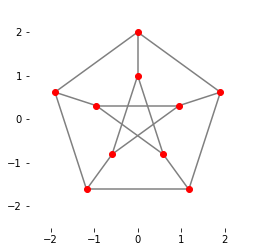

In [29]:
from math import pi, cos, sin
import matplotlib.pyplot as plt

# Five angles π/2 + i * 72°
angles = [i * 2*pi/5 + pi/2 for i in range(5)]

# The five nodes in the inner circle
points = [(cos(t), sin(t)) for t in angles]
# The five nodes in the outer circle
points += [(2*cos(t), 2*sin(t)) for t in angles]

# Shortcut for the x-y coordinates of each node
x = [x for x, _ in points]
y = [y for _, y in points]

def plot_edges():
    """Plot the graph without colouring the nodes."""
    plt.axes(frameon=False, aspect=1)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)

    # Build edges between the five nodes in the inner circle
    for i in range(5):
        j, j_ = i, (i+2)%5 # % (modulo -> j=4, j_=0)
        plt.plot([x[j], x[j_]], [y[j], y[j_]], color='grey')
        
    # Build edges between the inner and the outer circle
    for i in range(5):
        plt.plot([x[i], x[i+5]], [y[i], y[i+5]], color='grey')
        
    # Build edges between the five nodes on the outer circle
    for i in range(5):
        j, j_ = 5 + i, 5 + (i+1)%5 # % (modulo -> j=9, j_=5)
        plt.plot([x[j], x[j_]], [y[j], y[j_]], color='grey')

plot_edges()

# Colouring nodes
for i, (x_, y_) in enumerate(points):
    plt.plot(x_, y_, 'ro') # 'r' pour red, 'o' pour la forme du point

<div class="alert alert-warning">
<b>Problem #4: (easy)</b><br />
How many colours do you need to colour Petersen's graph? Print the coloured graph.
</div>

Solution found: P1=0, P2=0, P3=1, P4=1, P5=2, P6=1, P7=2, P8=0, P9=2, P10=0


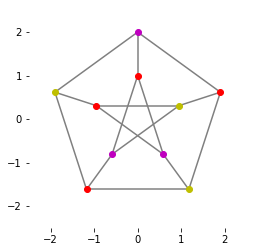

In [41]:
plot_edges()
[P1,P2,P3,P4,P5,P6,P7,P8,P9,P10] = [facile.variable(0, 10) for i in range(10)]
P_list = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]   

# Build edges between the five nodes in the inner circle
for i in range(5):
    j, j_ = i, (i+2)%5 # % (modulo -> j=4, j_=0)
    facile.constraint(P_list[j]!= P_list[j_])
        
    # Build edges between the inner and the outer circle
for i in range(5):
    facile.constraint(P_list[i]!= P_list[i+5])
        
    # Build edges between the five nodes on the outer circle
for i in range(5):
    j, j_ = 5 + i, 5 + (i+1)%5 # % (modulo -> j=9, j_=5)
    facile.constraint(P_list[j]!= P_list[j_])


if facile.solve([P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]):
    [VP1,VP2,VP3,VP4,VP5,VP6,VP7,VP8,VP9,VP10]= [x.value() for x in [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10]]
    print("Solution found: P1=%d, P2=%d, P3=%d, P4=%d, P5=%d, P6=%d, P7=%d, P8=%d, P9=%d, P10=%d" % (VP1,VP2,VP3,VP4,VP5,VP6,VP7,VP8,VP9,VP10))
else:
     print("No Solution Found")
        
var_list = [VP1,VP2,VP3,VP4,VP5,VP6,VP7,VP8,VP9,VP10]
color_list = ['ro','mo','yo','bo','go']
        
for i, (x_, y_) in enumerate(points):
    plt.plot(x_, y_, color_list[var_list[i]])
    

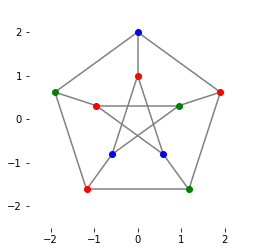

In [30]:
# %load petersen.py
colouring = [facile.variable(range(3)) for i, _ in enumerate(points)]
colours = ['ro', 'bo', 'go']

# Build edges between the five nodes in the inner circle
for i in range(5):
    j, j_ = i, (i+2)%5 # % (modulo -> j=4, j_=0)
    facile.constraint(colouring[j] != colouring[j_])

# Build edges between the inner and the outer circle
for i in range(5):
    facile.constraint(colouring[i] != colouring[i+5])

# Build edges between the five nodes on the outer circle
for i in range(5):
    j, j_ = 5 + i, 5 + (i+1)%5 # % (modulo -> j=9, j_=5)
    facile.constraint(colouring[j] != colouring[j_])

plot_edges()
    
if facile.solve(colouring):
    for i, (x_, y_) in enumerate(points):
        plt.plot(x_, y_, colours[colouring[i].value()])
else:
    print ("No solution found")

<div class="alert alert-danger"><a href="#peterson-more" data-toggle="collapse">**Important note (click to unfold):**</a><br/>
<div id="peterson-more" class="collapse">
The real question to answer is "how many colours do you need?". You may feel the urge to model the problem with a variable representing the number of colours. But take a step back, and think differently: try to solve the problem with 1 colour, then 2 colours and you find no solution. If you try 3 colours you find a solution, so 3 is the answer you want.
</div>
</div>

## The $n$-queen problem

<div class="alert alert-warning">
<b>Problem #5: (intermediate)</b><br />
Solve the 8-queen problem and pretty-print the solution. You may generalise your procedure for $n$ queens.
</div>


In [1]:
from facile import variable, alldifferent, constraint, solve


def n_queen(n):
    """Solves the n-queen problem. """
    queens = [variable(0, n-1) for i in range(n)]
    diag1 = [queens[i] + i for i in range(n)]
    diag2 = [queens[i] - i for i in range(n)]

    constraint(alldifferent(queens))
    constraint(alldifferent(diag1))
    constraint(alldifferent(diag2))

    if solve(queens):
        return [x.value() for x in queens]
    else:
        return None


def print_line(val, n):
    cumul = ""
    for i in range(n):
        if val == i:
            cumul = cumul + "o "
        else:
            cumul = cumul + "- "
    print (cumul)


if __name__ == "__main__":
    solution = n_queen(10)
    if solution is not None:
        print ("Solution for the 8-queen problem")
        [print_line(s, 10) for s in solution]
    else:
        print ("No solution found")

Solution for the 8-queen problem
o - - - - - - - - - 
- - o - - - - - - - 
- - - - - o - - - - 
- - - - - - - o - - 
- - - - - - - - - o 
- - - - o - - - - - 
- - - - - - - - o - 
- o - - - - - - - - 
- - - o - - - - - - 
- - - - - - o - - - 


In [44]:
# %load nqueens.py
def n_queens(n, *args, **kwargs):
    queens = [facile.variable(range(n)) for i in range(n)]
    diag1 = [queens[i] + i for i in range(n)]
    diag2 = [queens[i] - i for i in range(n)]

    facile.constraint(facile.alldifferent(queens))
    facile.constraint(facile.alldifferent(diag1))
    facile.constraint(facile.alldifferent(diag2))
    
    return facile.solve(queens, *args, **kwargs)
    
    
def print_line(val, n):
    cumul = ""
    for i in range(n):
        if val == i:
            cumul = cumul + "♛ "
        else:
            cumul = cumul + "- "
    print (cumul)
    

n = 8
solutions = n_queens(n).solution

if solutions is not None:
    print ("Solution found :")
    print
    [print_line(s, n) for s in solutions]
else:
    print ("No solution found")


Solution found :
♛ - - - - - - - 
- - - - ♛ - - - 
- - - - - - - ♛ 
- - - - - ♛ - - 
- - ♛ - - - - - 
- - - - - - ♛ - 
- ♛ - - - - - - 
- - - ♛ - - - - 


<div class="alert alert-danger"><a href="#alldifferent-more" data-toggle="collapse">**Important note (click to unfold):**</a><br/>
<div id="alldifferent-more" class="collapse">
The use of the *alldifferent* constraint is fundamental. You may think it is easier to write all the $\neq$-constraints, but look by yourself:
</div>
</div>

In [50]:
# %load lazy_nqueens.py
def lazy_n_queens(n, *args, **kwargs):
    queens = [facile.variable(range(n)) for i in range(n)]
    diag1 = [queens[i] + i for i in range(n)]
    diag2 = [queens[i] - i for i in range(n)]

    # facile.constraint(facile.alldifferent(queens))
    for i, q1 in enumerate(queens):
        for q2 in queens[i+1:]:
            facile.constraint(q1 != q2)
      
    # facile.constraint(facile.alldifferent(diag1))
    for i, q1 in enumerate(diag1):
        for q2 in diag1[i+1:]:
            facile.constraint(q1 != q2)
            
    # facile.constraint(facile.alldifferent(diag2))
    for i, q1 in enumerate(diag2):
        for q2 in diag2[i+1:]:
            facile.constraint(q1 != q2)
            
    return facile.solve(queens, *args, **kwargs)


In [51]:
%timeit n_queens(12)

100 loops, best of 3: 2.26 ms per loop


In [52]:
%timeit lazy_n_queens(12)

100 loops, best of 3: 4.63 ms per loop


<div class="alert alert-info">
**Let's look further into this!** (out of scope)<br />

The heuristics on the choice of the next variable have a significant impact on the number of backtracks.
</div>

By default, we choose the queens in order:
- `min_domain` chooses the next variable as the one with the smallest domain after propagation;
- `min_min` chooses the next variable as the one with the smallest smallest value in its domain after propagation;
- `queen` is the optimal strategy for the n-queen problem and combines the two previous strategies.

In [53]:
def queen_strategy(queens):
    if len([q.value() for q in queens if q.value() is None]) == 0:
        return -1
    else:
        min_ = min((len(q.domain()), q.min(), i)
                   for i, q in enumerate(queens) if q.value() is None)
        return min_[2]

In [54]:
print (n_queens(10, backtrack=True))
print (n_queens(10, strategy="min_domain", backtrack=True))
print (n_queens(10, strategy="min_min", backtrack=True))
print (n_queens(10, strategy=queen_strategy, backtrack=True))

Backtracks                    : 24
Current solution              : [0, 2, 5, 7, 9, 4, ...]
Resolution status             : True
Resolution time               : 0.0021s

Backtracks                    : 9
Current solution              : [0, 2, 5, 8, 6, 9, ...]
Resolution status             : True
Resolution time               : 0.00048s

Backtracks                    : 27
Current solution              : [0, 7, 1, 8, 5, 2, ...]
Resolution status             : True
Resolution time               : 0.0019s

Backtracks                    : 7
Current solution              : [0, 7, 1, 8, 5, 2, ...]
Resolution status             : True
Resolution time               : 0.00081s



In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 5.6)

interval = range(2, 20)
plt.plot(interval, [(n_queens(i, backtrack=True).backtrack) for i in interval])
plt.plot(interval, [(n_queens(i, strategy="min_domain", backtrack=True).backtrack) for i in interval])
plt.plot(interval, [(n_queens(i, strategy=queen_strategy, backtrack=True).backtrack) for i in interval], lw=2)


plt.axis((interval.start, interval.stop, 0, 70))
plt.legend(["regular", "min_domain", "queen"])

In [ ]:
print (n_queens(1001, strategy="queen", backtrack=True))

### Optimisation

`facile.solve` solves constraint satisfaction problem. You may solve optimisation problems with `facile.minimize`.

<div class="alert alert-success">
**Example :**
Find $x,y \in [0,3]$, constrained by $x \neq y$ and so that $x + y$ is maximum.
</div>

In [55]:
x, y = [facile.variable(range(5)) for i in range(2)]

facile.constraint(x != y)

# The second parameter represents the expression to minimize.
sol = facile.minimize([x, y], y)
print(sol)

Current evaluation            : 0
Current solution              : [1, 0]
Resolution status             : True
Resolution time               : 9e-05s



In [56]:
# You may have access to different parameters in the solution
print(sol.keys())

# The most useful are probably the two following ones
sol.evaluation, sol.solution

dict_keys(['solved', 'evaluation', 'solution', 'time'])


(0, [1, 0])

<div class="alert alert-warning">
**Problem #6: (intermediate)**<br />
 A Golomb ruler is a set of integers (marks) $a_1 < \cdots a_k$ such that all the differences $a_i - a_j$ (assuming $i > j$) are distinct.  <br />
 Clearly we may assume $a_1 = 0$.  Then $a_k$ is the length of the Golomb ruler. <br />
 For a given number of marks $n$, we want to find the shortest Golomb rulers.
</div>

*Note:* Above $n = 10$ the resolution time may be too long.

In [45]:
import facile

def golomb(n):

    n2 = 2 ** n
    
    ticks = [facile.variable(0, n2) for i in range(n)]

    # First tick at the start of the ruler
    facile.constraint(ticks[0] == 0)

    # Ticks are ordered
    for i in range(n-1):
        facile.constraint(ticks[i] < ticks[i+1])

    # All distances
    distances = []
    for i in range(n-1):
        for j in range(i + 1, n):
            distances.append(ticks[j] - ticks[i])
    facile.constraint(facile.alldifferent(distances))

    for d in distances:
        facile.constraint(d > 0)

    # Breaking the symmetry
    size = len(distances)
    facile.constraint(distances[size - 1] > distances[0])

    return (facile.minimize(ticks, ticks[n-1]))

if __name__ == "__main__":
    import sys
    
        
    print (golomb(7))

Current evaluation            : 25
Current solution              : [0, 1, 4, 10, 18, 23, ...]
Resolution status             : True
Resolution time               : 0.024s



In [47]:
# %load golomb.py
def golomb(n):
    ticks = [facile.variable(range(2**n)) for i in range(n)]

    # First tick at the start of the ruler
    facile.constraint(ticks[0] == 0)

    # Ticks are ordered
    for i in range(n-1):
        facile.constraint(ticks[i] < ticks[i+1])

    # All distances
    distances = []
    for i in range(n-1):
        for j in range(i + 1, n):
            distances.append(facile.variable(ticks[j] - ticks[i]))
    facile.constraint(facile.alldifferent(distances))

    for d in distances:
        facile.constraint(d > 0)

    # Breaking the symmetry
    size = len(distances)
    facile.constraint(distances[size - 1] > distances[0])

    return (facile.minimize(ticks, ticks[n-1], backtrack=True, on_solution=print))


print (golomb(9))

Backtracks                    : 0
Current evaluation            : 65
Current solution              : [0, 1, 3, 7, 12, 20, ...]
Resolution status             : False
Resolution time               : 0.00099s

Backtracks                    : 1
Current evaluation            : 61
Current solution              : [0, 1, 3, 7, 12, 20, ...]
Resolution status             : False
Resolution time               : 0.0013s

Backtracks                    : 2
Current evaluation            : 59
Current solution              : [0, 1, 3, 7, 12, 20, ...]
Resolution status             : False
Resolution time               : 0.0016s

Backtracks                    : 14
Current evaluation            : 57
Current solution              : [0, 1, 3, 7, 12, 26, ...]
Resolution status             : False
Resolution time               : 0.0029s

Backtracks                    : 24
Current evaluation            : 53
Current solution              : [0, 1, 3, 7, 15, 24, ...]
Resolution status             : False
Resoluti

<div class="alert alert-danger"><a href="#golomb-more" data-toggle="collapse">**Important note (click to unfold):**</a></div>
<div id="golomb-more" class="collapse">
<div class="alert alert-danger">
Note how you may build a list of expressions $t_i-t_j$ and pass it to *alldifferent*.
</div>

You may also wonder why the correction mentions a domain of variables between 0 and $2^n$.
Consider the assignment `ticks[i] = 2**i` and see how it is a solution to our satisfaction problem. See how you write $2^i - 2^j$ in binary to convince yourself. Then our problem consists of finding the shortest Golomb rule, that is shorter than $2^n$.

Obviously, you are not expected to find this trick by yourself. Initialising the domain to some *reasonably* big range is enough to solve small instances of the problem.

<div class="alert alert-info" style="margin-top: 1em">
**Branch & Bound**: Note how many more backtracks you need to confirm that your better evaluation is the optimal one.
</div>
</div>

<div class="alert alert-warning">
<b>Problem #7: (difficult)</b><br />
You are given an 8 pint bucket of water, and two empty buckets which can contain 5 and 3 pints respectively. You are required to divide the water into two by pouring water between buckets (that is, to end up with 4 pints in the 8 pint bucket, and 4 pints in the 5 pint bucket).<br /><br />

What is the minimum number of transfers of water between buckets?
</div>

<div class="alert alert-danger"><a href="#buckets-more" data-toggle="collapse">**Solution for the modelling part (click to unfold)**:</a></div>
<div id="buckets-more" class="collapse">
<div class="alert alert-danger">
The difficult part here is to get what will be the variables we manipulate. We do not know in advance the number of steps. **The number of steps determines the number of variables, so we cannot make it a variable**: we make it a **constant parameter** that we grow until we find a solution.
</div>


So we have the following table of variables, with the first constraints set:

|       | $s_3$ | $s_5$ | $s_8$ |
|-------|-------|-------|-------|
| $t_1$ | 0     | 0     | 8     |
| $t_2$ | ...   | ...   | ...   |
| $t_3$ | ...   | ...   | ...   |
| ...   | ...   | ...   | ...   |
| ...   | ...   | ...   | ...   |
| $t_n$ | 0     | 4     | 4     |


Then the constraints that we have to program:

- Between two consecutive steps, *exactly two buckets* see their water amount change;
- At each step, the total volume of water is constant;
- Between two consecutive steps, for all pairs of buckets:
    - *either* one of the buckets keeps the same amount of water;
    - *or*, one of the two buckets ends up full;
    - *or*, one of the two buckets ends up empty.
    
<div class="alert alert-danger" style="margin-top: 1em">
**Important note**: Writing *exactly two buckets see their water amount change* is a bit tricky.<br/>
</div> 

You cannot have it with a simple disjunction of constraint (the Python operator `|` which stands for **or**).

You would probably end up saying "the first bucket stays untouched" **or** "the second bucket stays untouched" **or** "the third bucket stays untouched" which does not capture the idea that if one bucket stays untouched, there is a movement of water between the others.

The key here is to use a mechanism called *constraint reification*, that is we (automatically) associate a binary variable to a constraint, taking the value 0 if the constraint is violated in the current assignment and 1 if the constraint is true.

So when we write :
```python
    facile.constraint(sum([e[t][i] != e[t+1][i] for i in something]) == 2)
```

that is, $$\sum \left(e_{t,i} \neq e_{t+1, i} \right) = 2$$
we mean:

- that **exactly** `2` "$\neq$" constraints in the included list are verified,
- **and** that **exactly** `(len(something) - 2)` "$\neq$" constraints in the included list are violated.

In [58]:
# %load buckets.py
# Number of buckets
nb = 3
# Number of steps (let's say we know... :p)
steps = 8
# The capacity of each bucket
capacity = [8, 5, 3]

buckets = [ [facile.variable(range(capacity[b]+1)) for b in range(nb)] for i in range(steps)]

facile.constraint(buckets[0][0] == 8)
facile.constraint(buckets[0][1] == 0)
facile.constraint(buckets[0][2] == 0)

facile.constraint(buckets[steps - 1][0] == 4)
facile.constraint(buckets[steps - 1][1] == 4)
facile.constraint(buckets[steps - 1][2] == 0)

for i in range(steps - 1):
    # we change the contents of two buckets at a time
    facile.constraint( sum([buckets[i][b] != buckets[i+1][b] for b in range(nb)]) == 2)
    # we play with a constant amount of water
    facile.constraint(sum([buckets[i][b] for b in range(nb)]) == 8)
    for b1 in range(nb):
        for b2 in range(b1):
            facile.constraint(
                # either the content of the bucket does not change
                (buckets[i][b1] == buckets[i+1][b1]) |
                (buckets[i][b2] == buckets[i+1][b2]) |
                # or the bucket ends up empty or full
                (buckets[i+1][b1] == 0) | (buckets[i+1][b1] == capacity[b1]) |
                (buckets[i+1][b2] == 0) | (buckets[i+1][b2] == capacity[b2])
                )

print (facile.solve([b for sub in buckets for b in sub], backtrack=True))
for sub in buckets:
    print ([b.value() for b in sub])

Backtracks                    : 422
Current solution              : [8, 0, 0, 3, 5, 0, ...]
Resolution status             : True
Resolution time               : 0.034s

[8, 0, 0]
[3, 5, 0]
[3, 2, 3]
[6, 2, 0]
[6, 0, 2]
[1, 5, 2]
[1, 4, 3]
[4, 4, 0]
